In [23]:
import scipy.signal as signal
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio # para escuchar la senal

def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    h_pot = abs(h)
    
    plt.figure(figsize=(18,8))

    subplot(211)
    plot(w/max(w),h_pot)
    ylabel('Magnitude (W)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')

    subplot(212)
    h_Phase =  np.angle(h)  #unwrap(arctan2(imag(h),real(h)))

    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    #xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)
    show()
    
    
def impz(num,den=1):
    l = len(num)+30
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(num,den,impulse)
    plt.figure(figsize=(18,8))
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)
    show()

def zeropoles(num, den=1):
    w,h = signal.freqz(num,den)
    sys1=signal.lti(num, den)
    ang=np.arange(0.0,2*np.pi,0.01)
    xp=np.cos(ang)
    yp=np.sin(ang)
    plt.figure(figsize=(10,8))
    plot(xp,yp,'--')
    plot(sys1.zeros.real, sys1.zeros.imag, 'o')
    plot(sys1.poles.real, sys1.poles.imag, 'x')
    grid()
    show()

    
    
def computeZ(num, den, zeros, poles, data):
    sys1=signal.lti(num, den)
    w,h = signal.freqz(num, den)
    # agrego los polos y ceros al sistema
    zerosnew=np.hstack((sys1.zeros, zeros))
    polesnew=np.hstack((sys1.poles, poles))
    #gain=sys1.gain
    num2=np.poly(zerosnew)
    den2=np.poly(polesnew)
    #Impulse and step response
    figure(2)
    impz(num2, den2)
    show()
    #zero-poles diagrams
    zeropoles(num2, den2)
    show()
    #Frequency and phase response
    mfreqz(num2, den2)
    show()
    data2=signal.lfilter(num2, den2, data)
    subplot(211)
    plot(data)
    subplot(212)
    plot(data2)
    show()

<h1> LABORATORIO 5:TRANSFORMADA Z </h1>
<h2> Nombre: Harold Adrián Gómez Gil </h2>
    
    


<h1>Transformada Z</h1>


$$y[n] -2.83y[n-1] + 4y[n-3] = 2x[n] -3x[n-1]+x[n-2]$$
$$Y[z] - 2.83Y[z]Z^{-1} + 4Y[z]Z^{-3} = 2X[z] - 3X[z]Z^{-1} + X[z]Z^{-2}  $$ 
$$Y[z](1-2.83Z^{-1}+4Z^{-3}) = X[z](2 - 3Z^{-1} + Z^{-2}) $$
$$H[z]=\frac{Y[z]}{X[z]}$$
$$H[z]=\frac{2 - 3Z^{-1} + Z^{-2}}{1-2.83Z^{-1}+4Z^{-3}}$$ 

Multiplicando por $z^{3}$ arriba y abajo, se tiene:

$$H[z]=\frac{2z^{3} - 3Z^{2} + Z}{Z^{3}-2.83Z^{2}+4}$$
<h2>1. Uso de las funciones</h2>



C:\Users\Asus\AppData\Local\Temp\ipykernel_3712\2173572026.py:8: RuntimeWarning: divide by zero encountered in log10
  h_dB = 20 * log10 (abs(h))


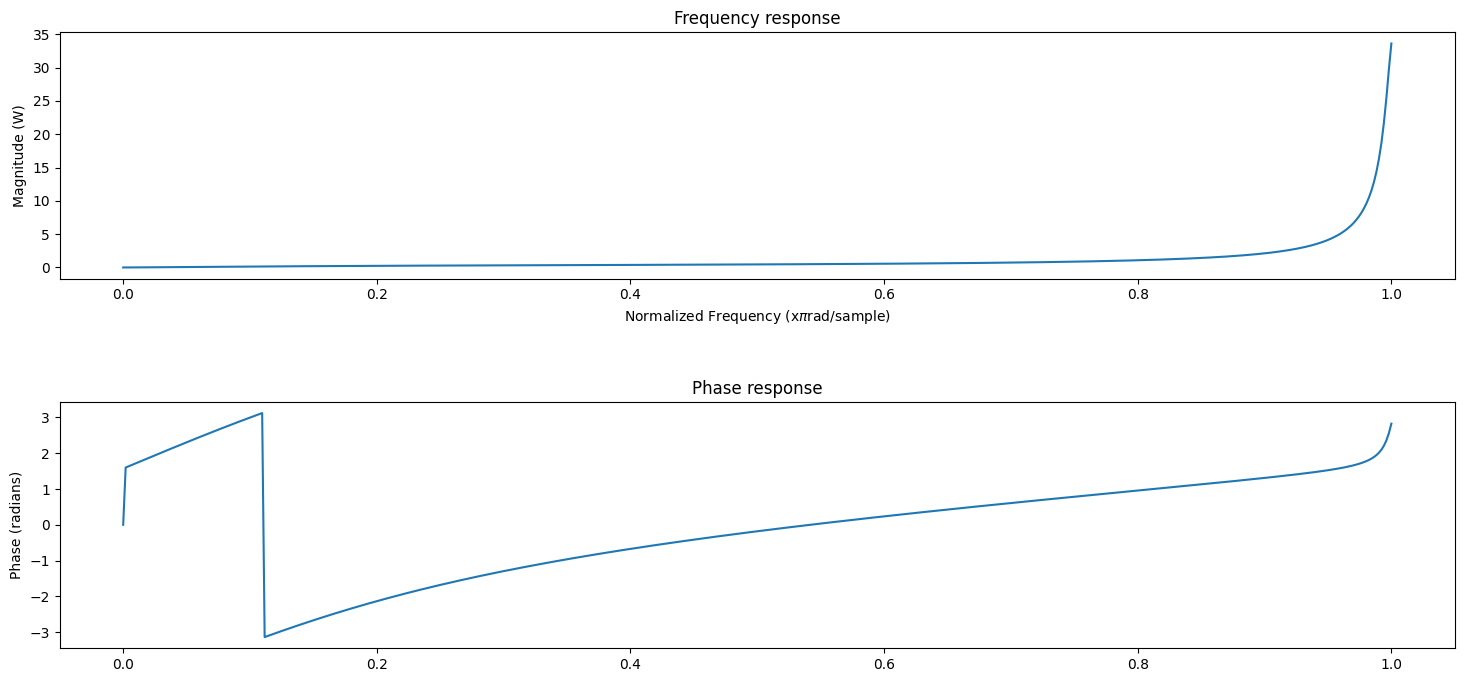

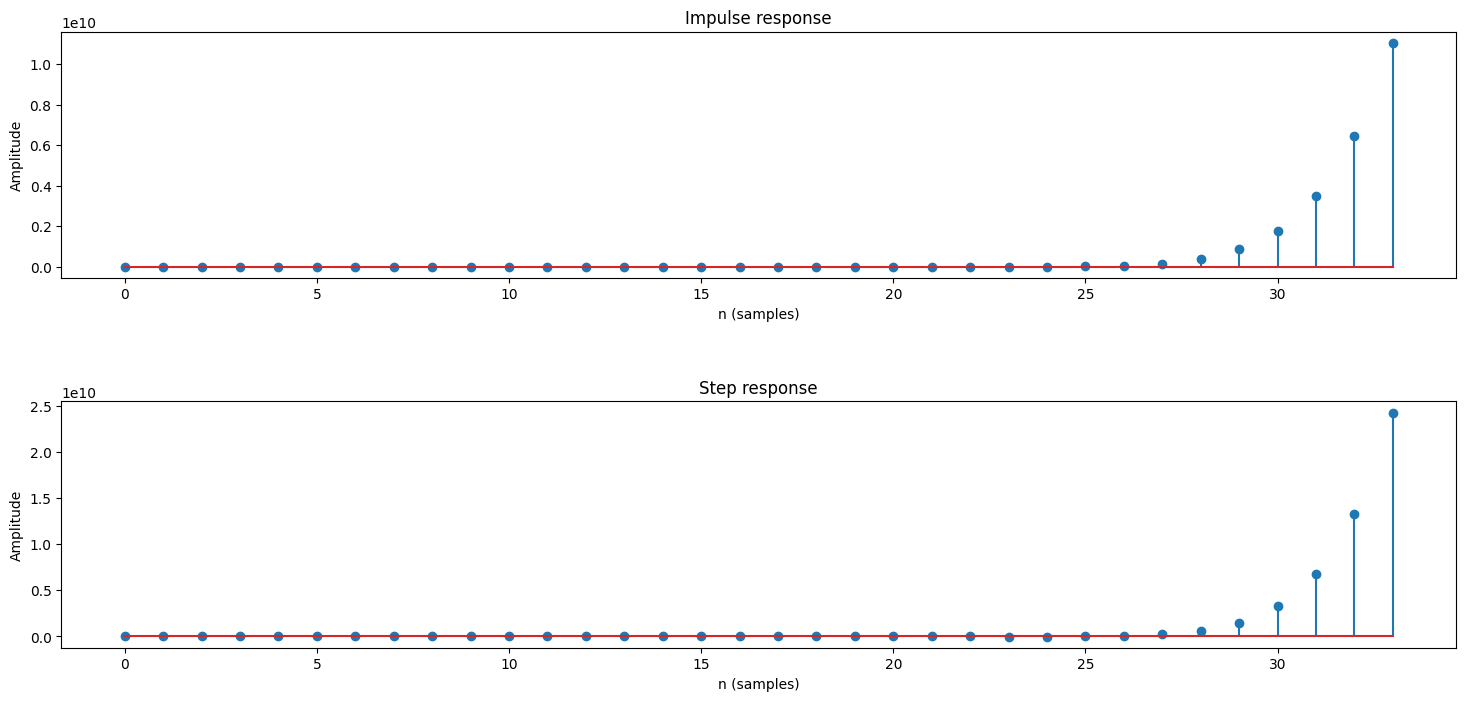

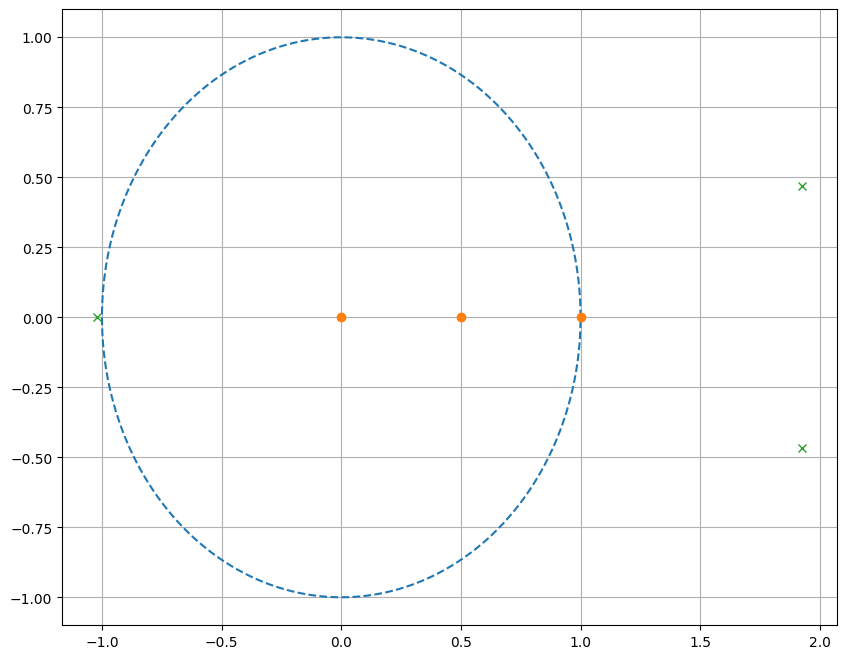

In [24]:
num = [2 ,-3, 1,0]
den = [1, -2.83, 0,4 ]
#Respuesta en frecuencia y fase
mfreqz(num,den)
# respuesta al impulso y escalon
impz(num,den)
# zeros y polos
zeropoles(num,den)

<h2>2.¿Donde están ubicados los polos y los ceros?</h2>

<p>El valor de los polos y ceros se encuentran en: 
<li>Ceros: un cero en el origen, otro cero en 0.5 y finalmente un tercero en: 1</li>
<li> Polos: Se tiene uno real ubicado aproximadamente en -1 y un par de complejos conjugados aproximadamente en 0.5 y -0.5</li>

</p>

<h2>3.¿Qué se puede decir de la respuesta en frecuencia y fase de la FT?<h2>


<p>Graficamente del diagrama de magnitud se ve como se comporta como un pasa altas, en donde se van a dejar pasar las altas frecuencias y las demás se atenuan, por otro lado con el diagrama de fase, se ve como durante un intervalo va adelantando la señal y la atrasa abruptamente en aproximadamente 0.1, para posteriormente ir adelantando la señal progresivamente</p>

<h2>4. Que se puede decir de la respuesta al impulso y al escalon?</h2>

<p></p>

<h2>5. Que se puede decir de la estabilidad del sistema?</h2>

<p>Basados en la ecuación en diferencias que rige el ejercicio en cuestión, es posible determinar que el sistema es causal, por que mantiene valores mayores a cero, además al visualizar el diagrama de polos y ceros, se como uno de los polos está en el borde del circulo unitario (el real), mientras que los complejos conjugados están por fuera, es por ello que el sistema se puede definir como <strong>Causal e inestable</strong></p>

<h1>2.Transformada Z: Introducción a los filtros digitales. </h1>

<p>2.1. Genere una se˜nal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadr´atica. La se˜nal
debe tener una duraci´on de 40 segundos y una frecuencia de muestreo de 5000 Hz</p>

<p>2.2. Grafique y escuche la señal</p>

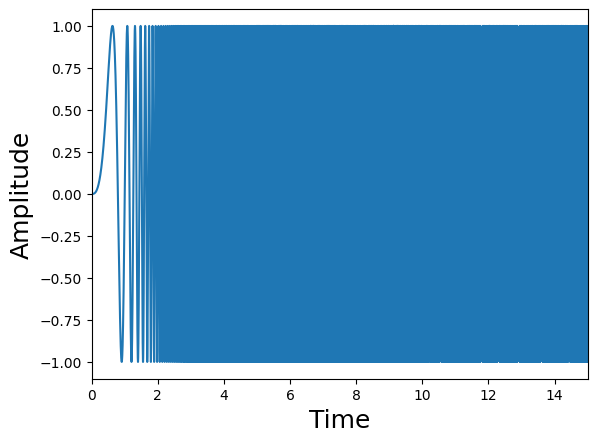

In [48]:

fs=5000 # Frecuencia de muestreo 
t=np.arange(0, 40, 1.0/fs) # Vector de tiempo
f= t**2 # Frecuencia de la senal
x = np.sin(2*np.pi*f*t)

plt.plot(t,x)
plt.xlim(0,15)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.show()
Audio(x, rate=fs) # para escuchar la senal, si se desea

<p>A medida que va aumentando la frecuencia</p>

<p>2.3.Genere la función de transferencia de respuesta finita al impulso (FIR) usando:</p>

In [43]:
n = 9
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

<p>2.4.Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escal´on, y el diagrama
de polos y ceros del filtro FIR.</p>

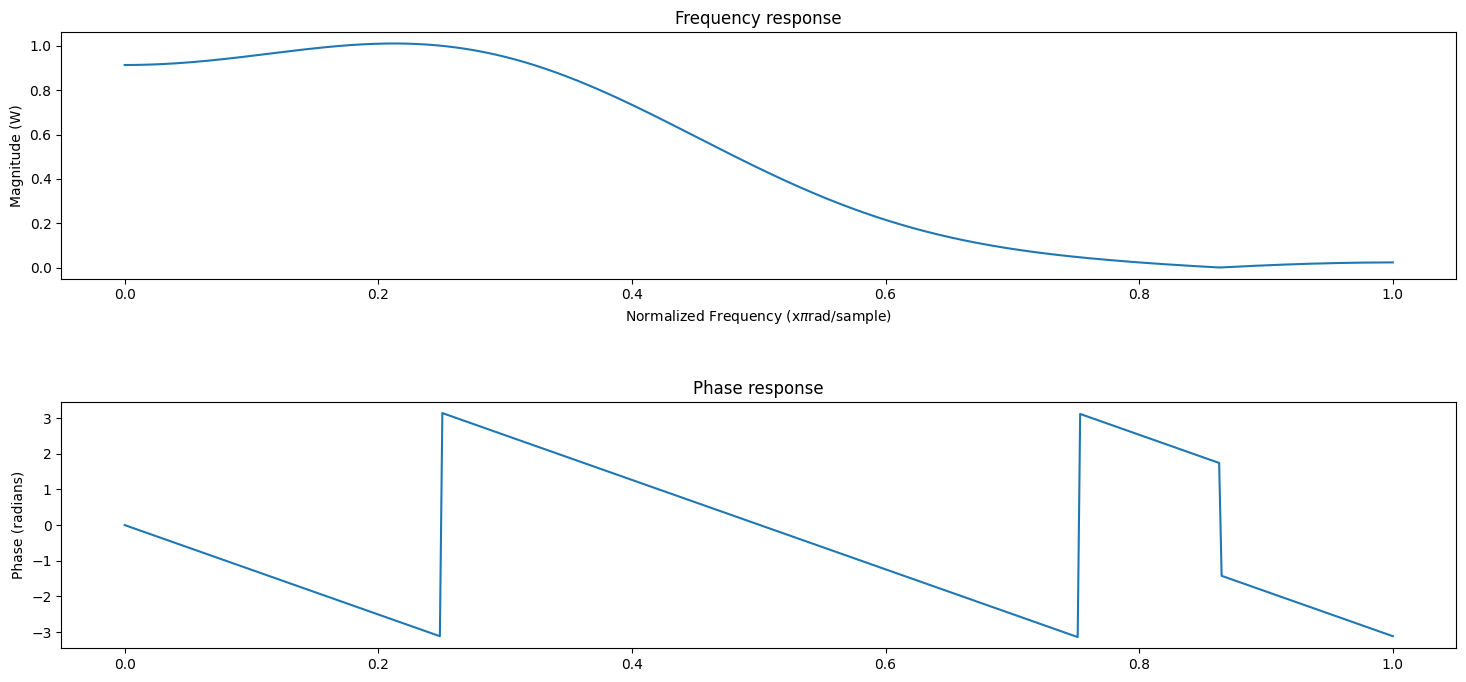

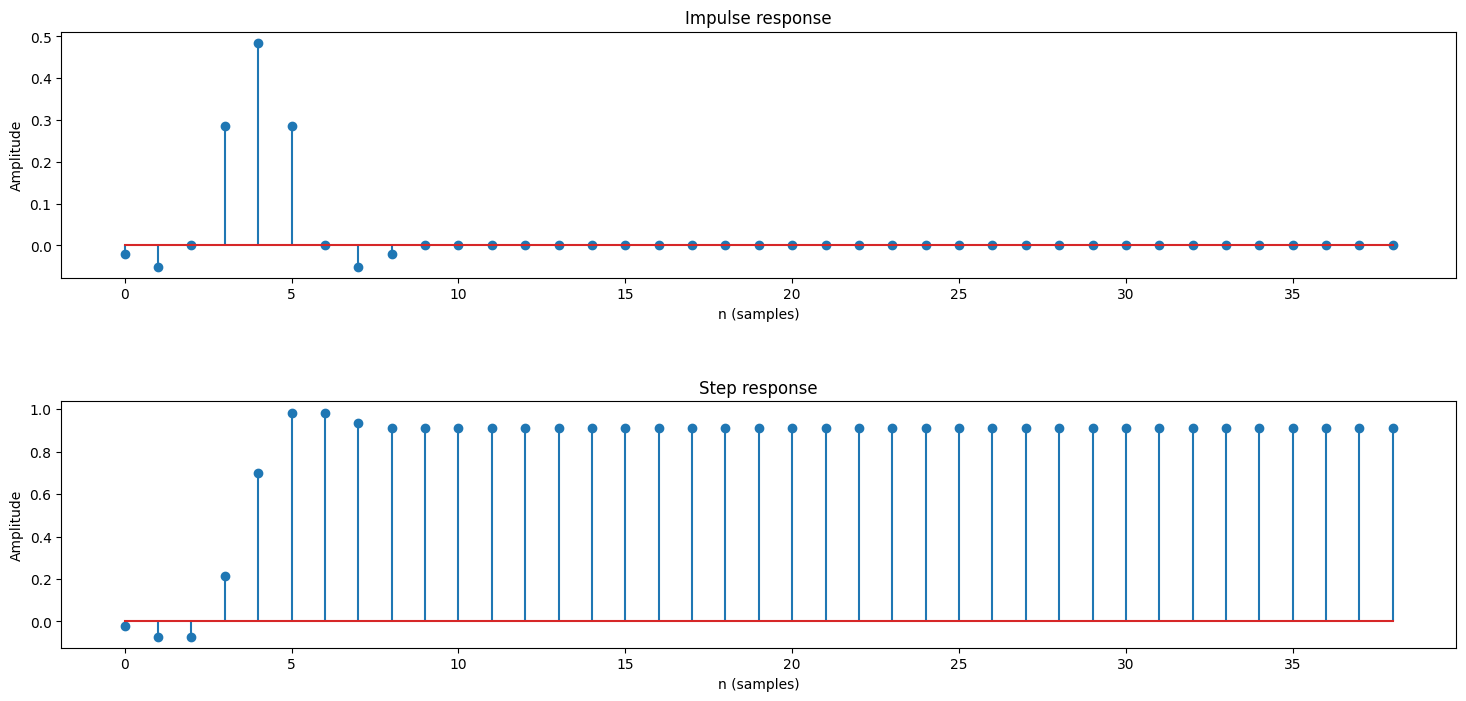

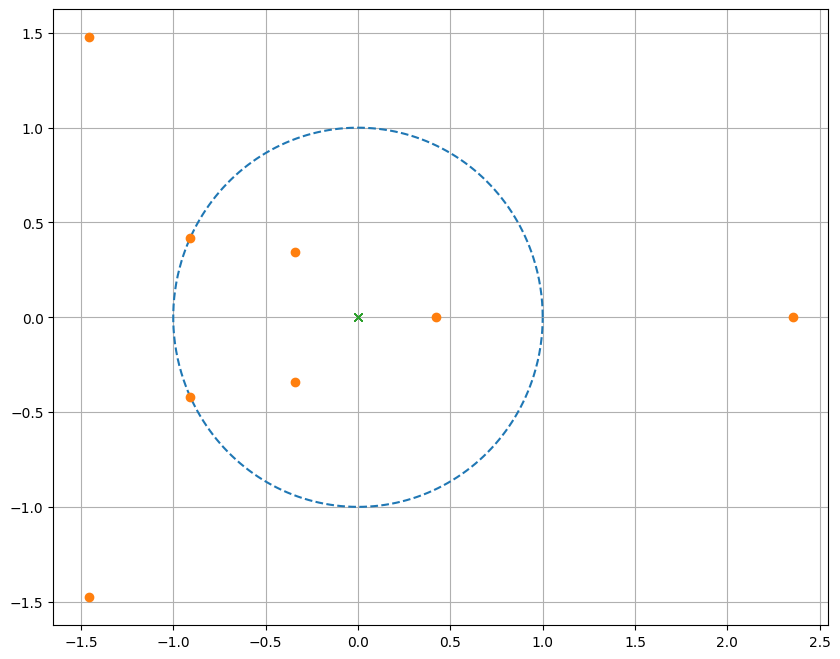

In [44]:
mfreqz(num, den)
impz(num,den)
zeropoles(num,den)

<p>2.5. ¿Qu´e puede concluir acerca de las gr´aficas anteriores? ¿Qu´e tipo de filtro es? ¿Cu´ales son las frecuencias
de corte? ¿D´onde est´an ubicados los polos y ceros? ¿Qu´e puede decir de la estabilidad del filtro?
</p>

<p>De las graficas anteriores se puede concluir que: 
    <li>Tipo de filtro: Se trata de un pasabajas, en el cual se dejan pasar las bajas frecuencias y las altas se atenuan</li>
    <li>Frecuencias de corte: </li>
    <li>Frecuencias de corte: según lo define la función se da en 0.1 y 0.4</li>
    <li>Polos y ceros: El sistema tiene un polo en cero, y tiene gran variedad de ceros, entre los cuales tiene complejos conjugados en 1.5, 0.4 , ceros reales en0.4 y 2.4 aprox 
     </li>
    <li>El sistema es estable al tener el polo en el centro de la circunferencia unitaria</li>


</p>

<p>2.6. Calcule la respuesta del filtro ante la se˜nal generada previamente. Grafique la se˜nal antes y despu´es de
pasar por el filtro. ¿Qu´e le ocurri´o a la se˜nal?
</p>

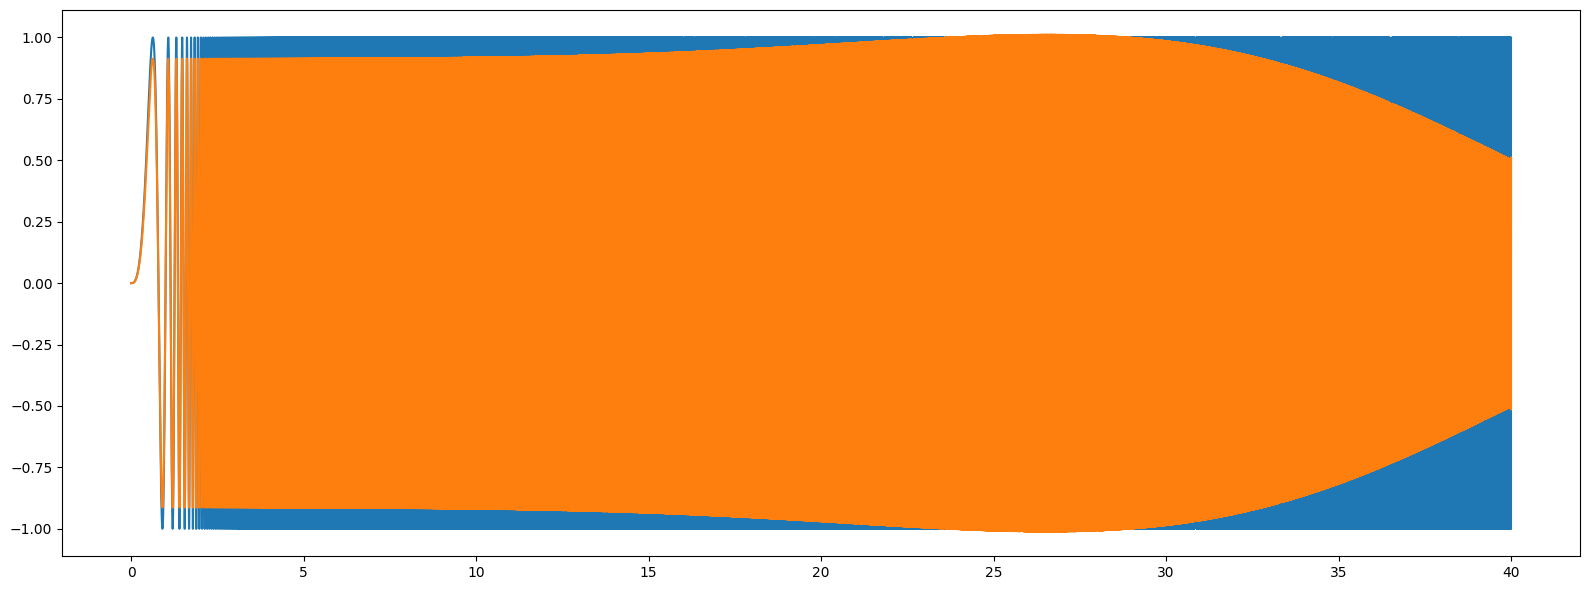

In [45]:
data2=np.convolve(x, num, mode='same')
plt.figure(figsize=(16,6))
plt.plot(t,x)
plt.plot(t, data2)
plt.tight_layout()
plt.show()

<p>Lo que se puede ver con el seno a medida que va pasando por el filtro, es que se nota como en los puntos donde se ven unos cortes y la presencia de un nodulo,que corresponde a las frecuencias de corte de la señal senosoidal, además se puede ver a como se comporta la grafica naranja, que parece un sistema en rechazabanda.  </p>

<p>2.7. Aumente progresivamente el orden n del filtro (minimo 3 veces), repita items 3,4,5,6 y concluya, que se puede decir de los polos y ceros y la respuesta en frecuencia. 
</p>

<h2>N=18<h2>

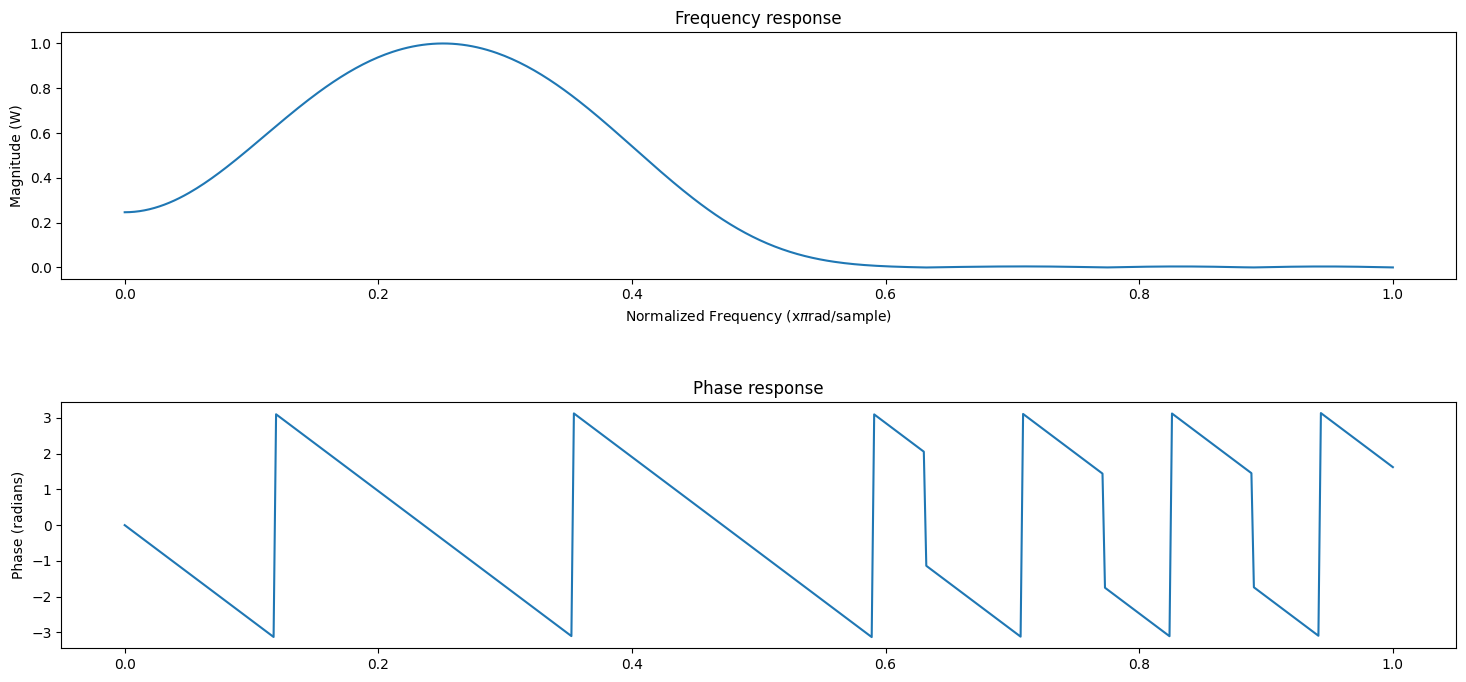

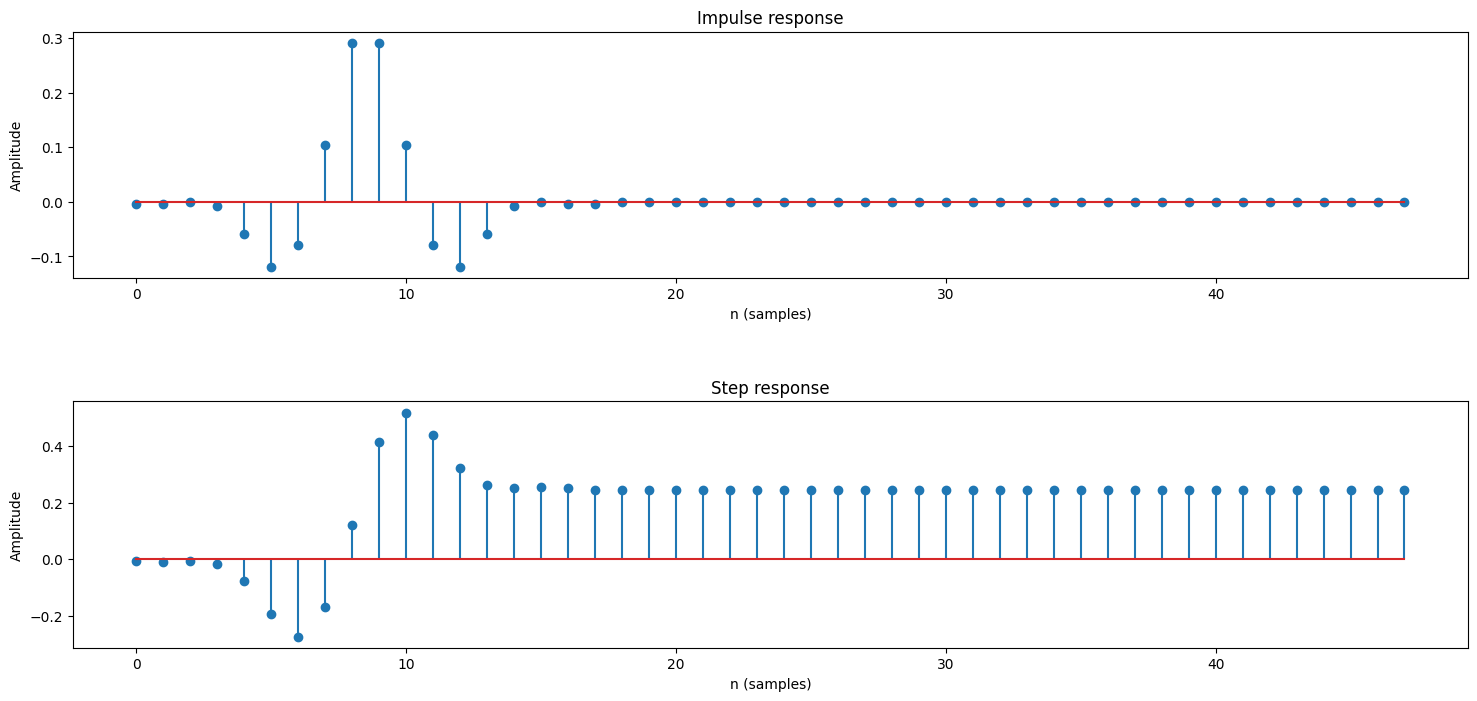

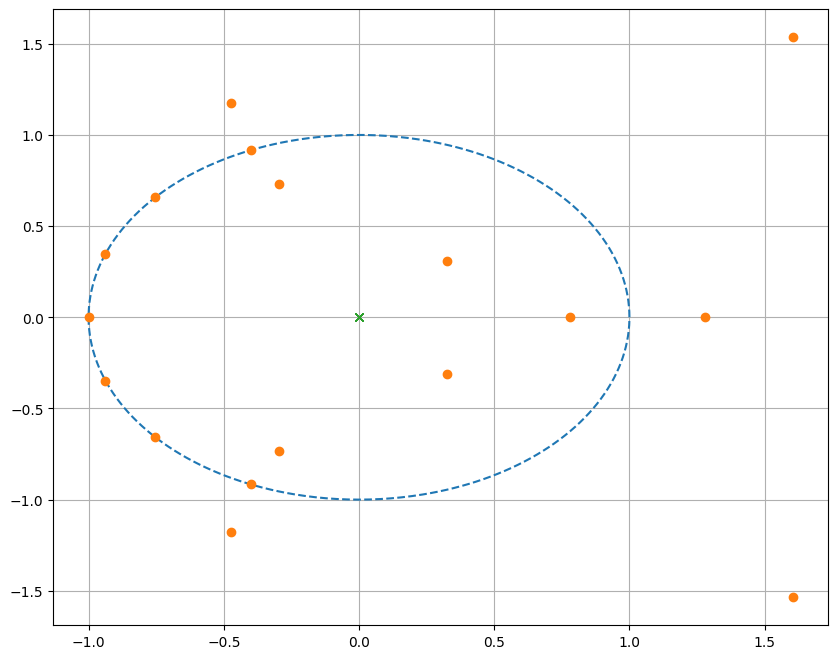

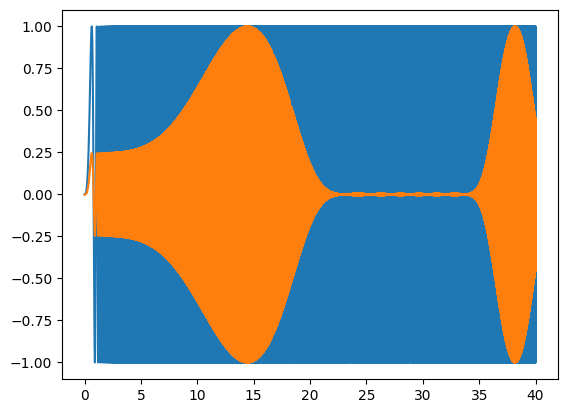

In [36]:
n = 18
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

mfreqz(num, den)
impz(num,den)
zeropoles(num,den)

data2=np.convolve(x, num, mode='same')

plt.plot(t,x)
plt.plot(t, data2)
plt.show()

<h2>N=27<h2>

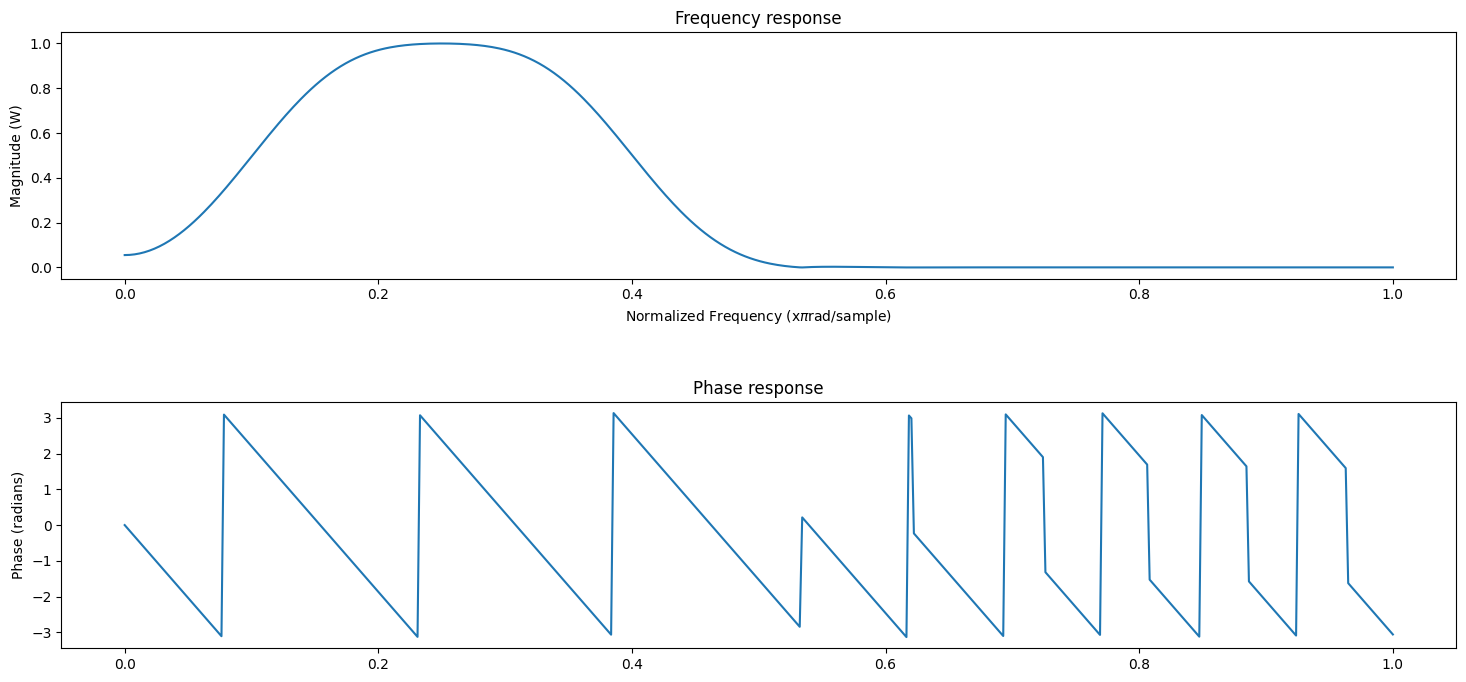

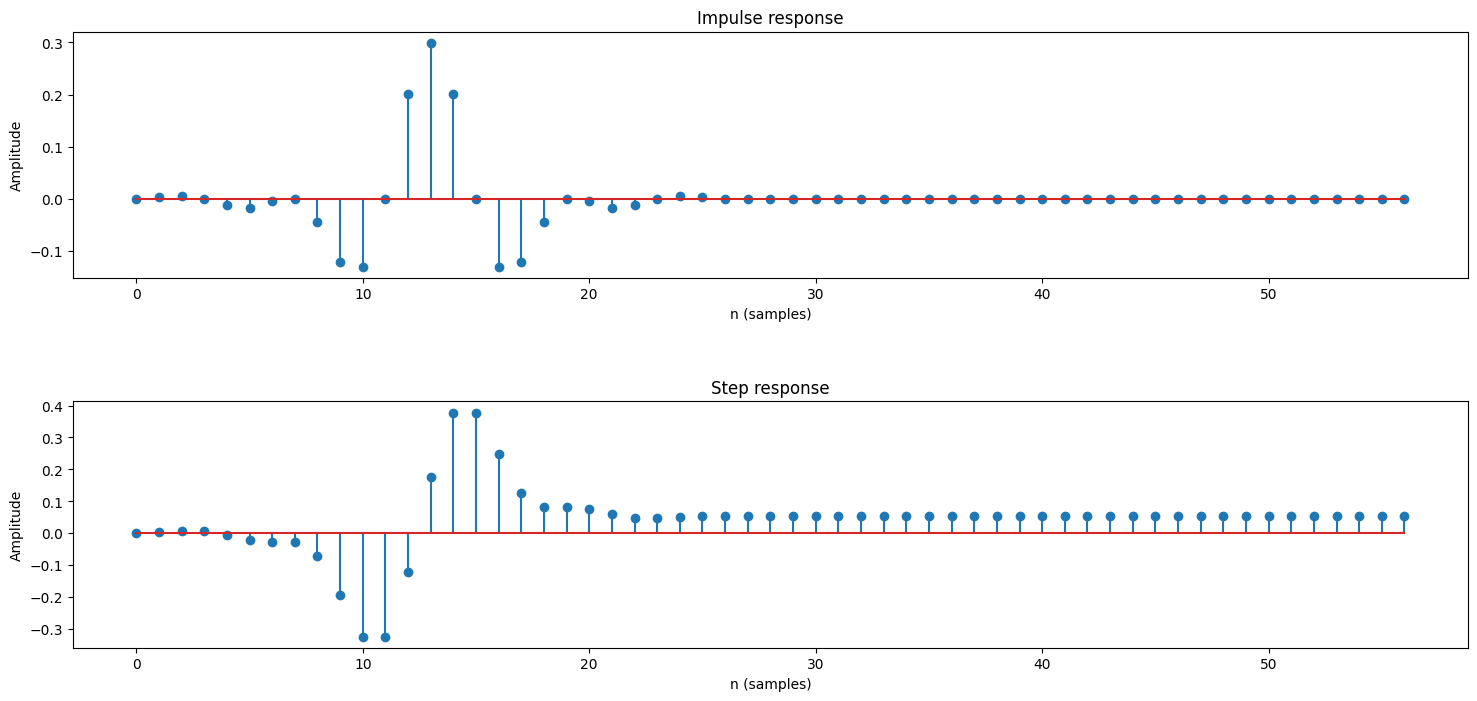

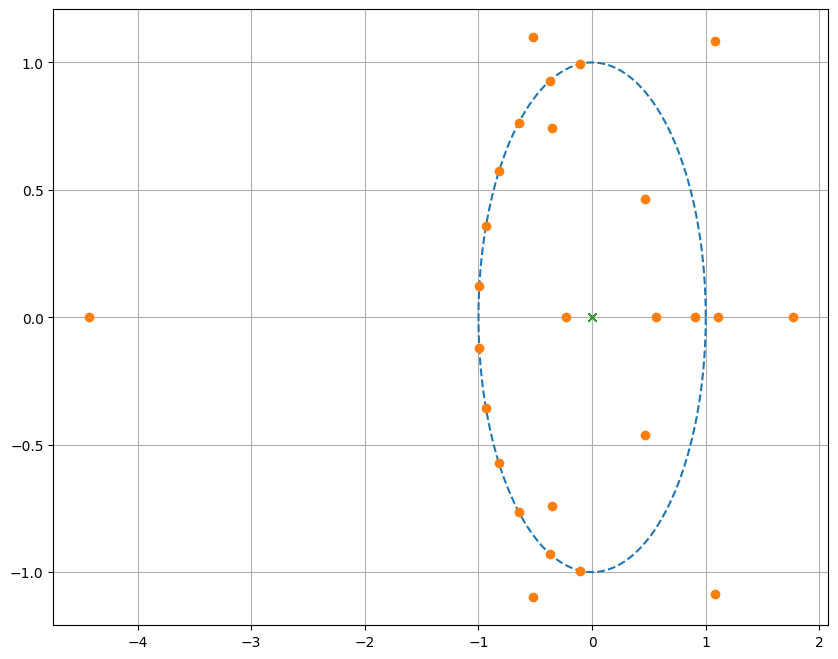

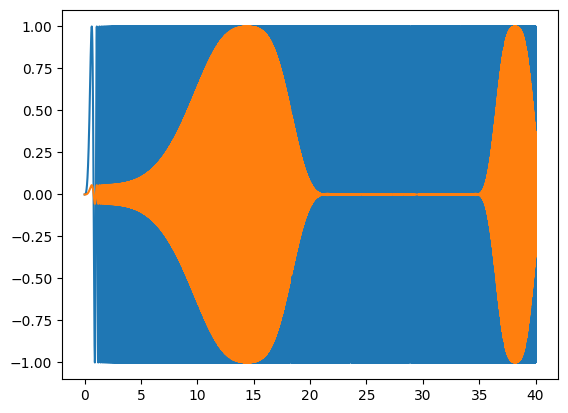

In [37]:
n = 27
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

mfreqz(num, den)
impz(num,den)
zeropoles(num,den)

data2=np.convolve(x, num, mode='same')

plt.plot(t,x)
plt.plot(t, data2)
plt.show()

<h2>N=36<h2>

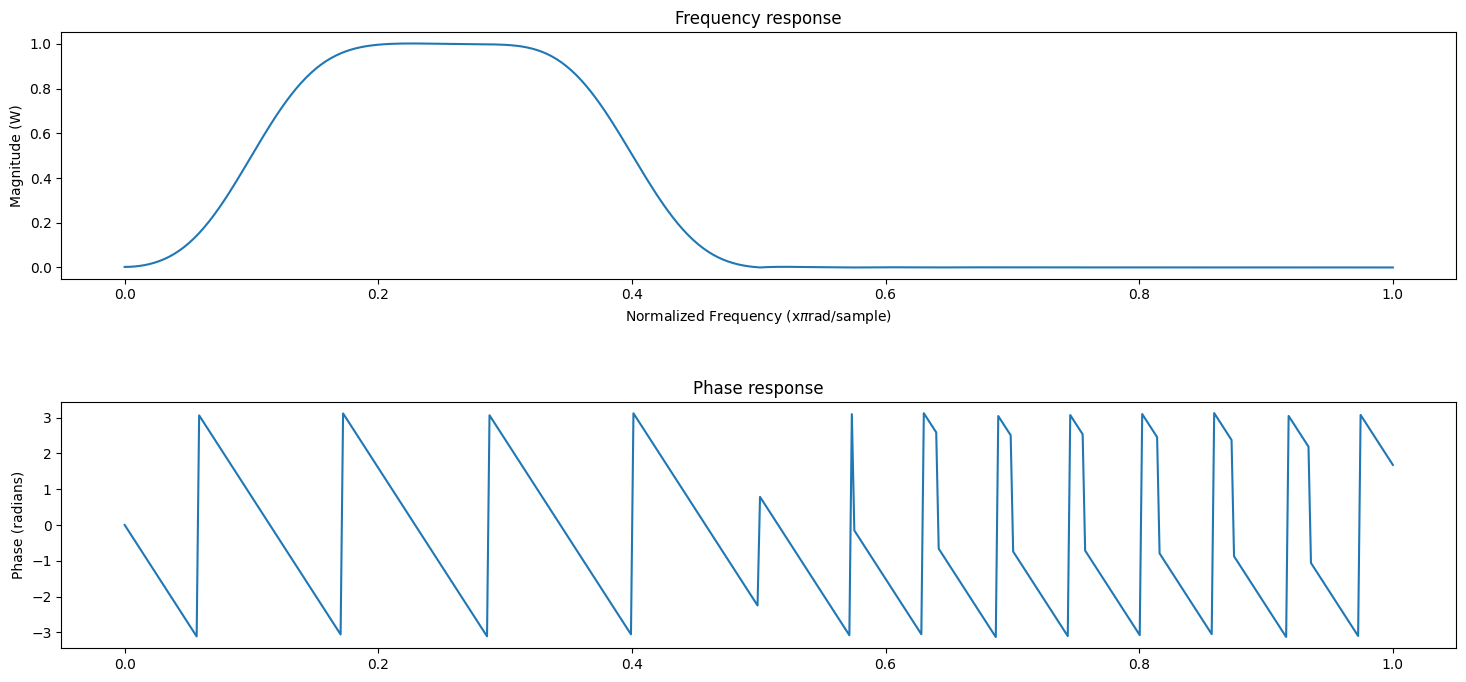

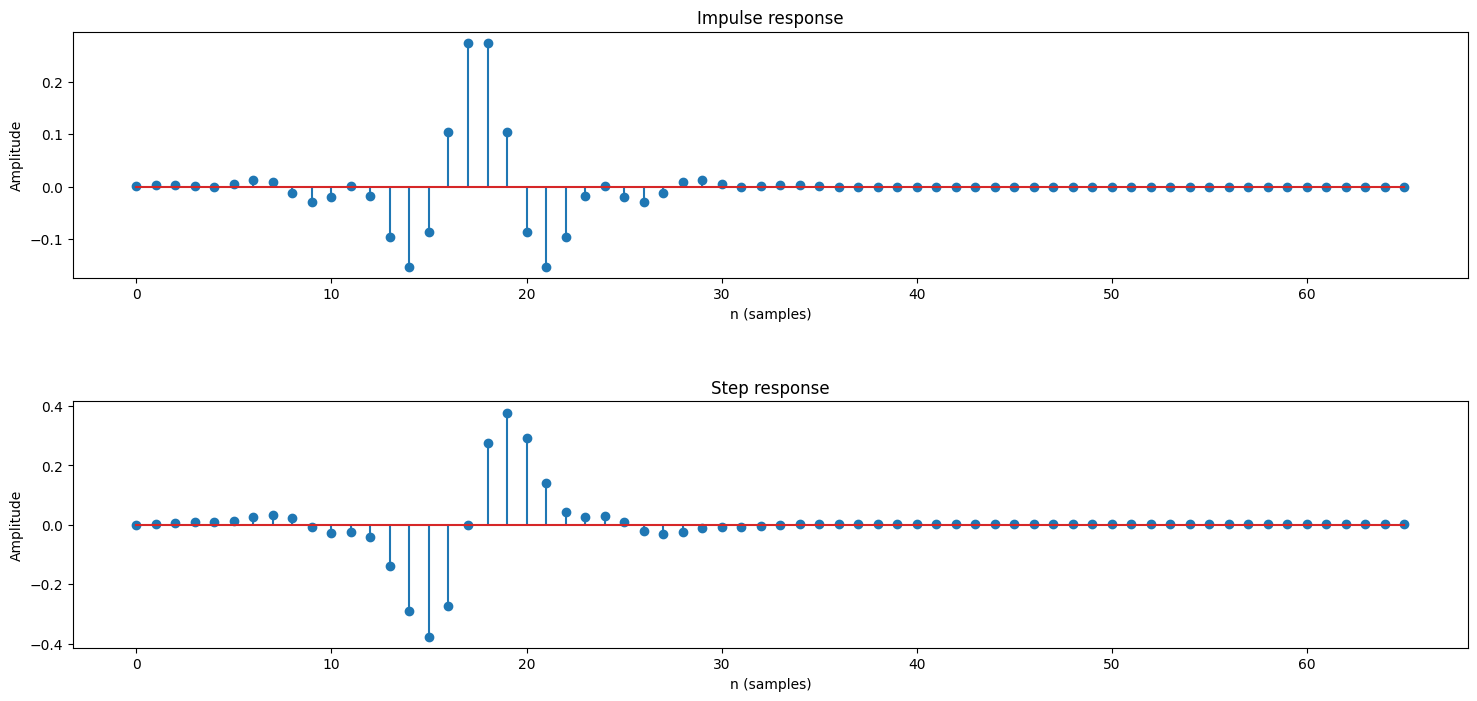

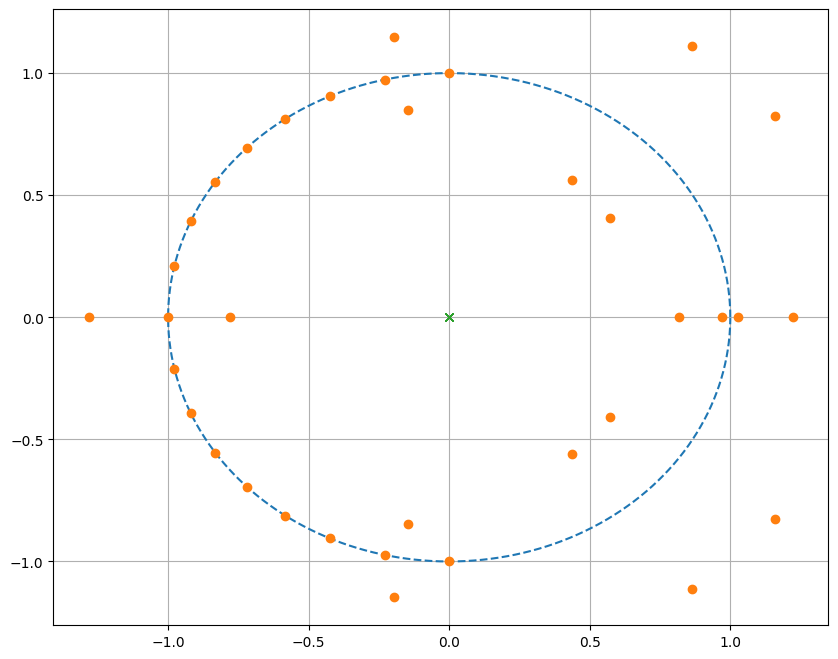

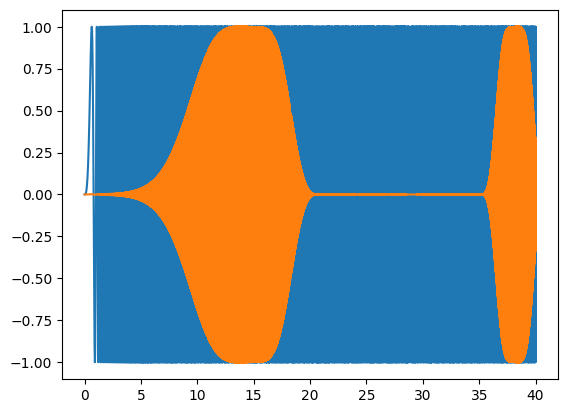

In [38]:
n = 36
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

mfreqz(num, den)
impz(num,den)
zeropoles(num,den)

data2=np.convolve(x, num, mode='same')

plt.plot(t,x)
plt.plot(t, data2)
plt.show()

<p>En terminos generales a medida que aumenta el orden del filtro, lo que es claro es que van a aparecer mayor cantidad de ceros, sin embargo los sistemas siguen siendo estables al tener el único polo presente en el centro de la circunferencia unitaria, por otro lado, con los diagramas de bode de fase y magnitud se ve un comportamiento tipo psabandas en en todos los casos y en la fase se ve como el comportamiento se ve más cercano a un diente de sierra a medida que los N aumentan. </p>

<p>2.8. Genere una se˜nal sinusoidal cuya frecuencia se incremente en el tiempo de forma c´ubica, la se˜nal debe
tener la misma duraci´on (40 seg) y una frecuencia de muestreo de 3000 Hz. Repita los pasos 3, 4, 5 y
6. Concluya de acuerdo a las gr´aficas obtenidas.
</p>

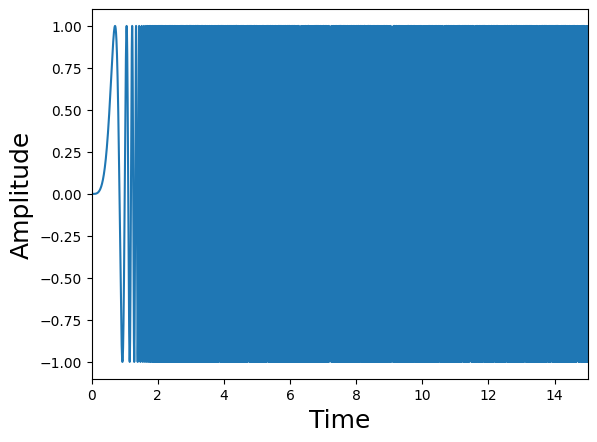

In [39]:
fs=3000 # Frecuencia de muestreo 
t=np.arange(0, 40, 1.0/fs) # Vector de tiempo
f= t**3 # Frecuencia de la senal
x = np.sin(2*np.pi*f*t)

plt.plot(t,x)
plt.xlim(0,15)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.show()
Audio(x, rate=fs) # para escuchar la senal, si se desea

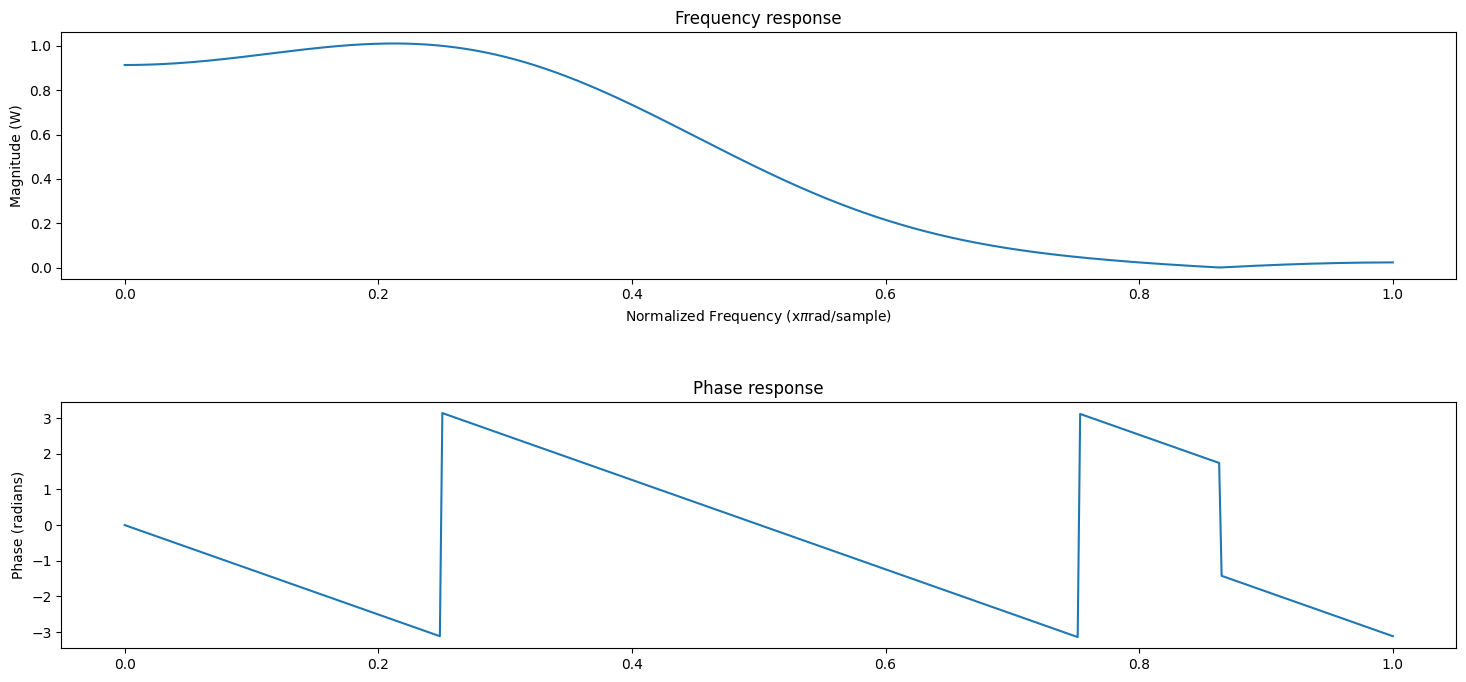

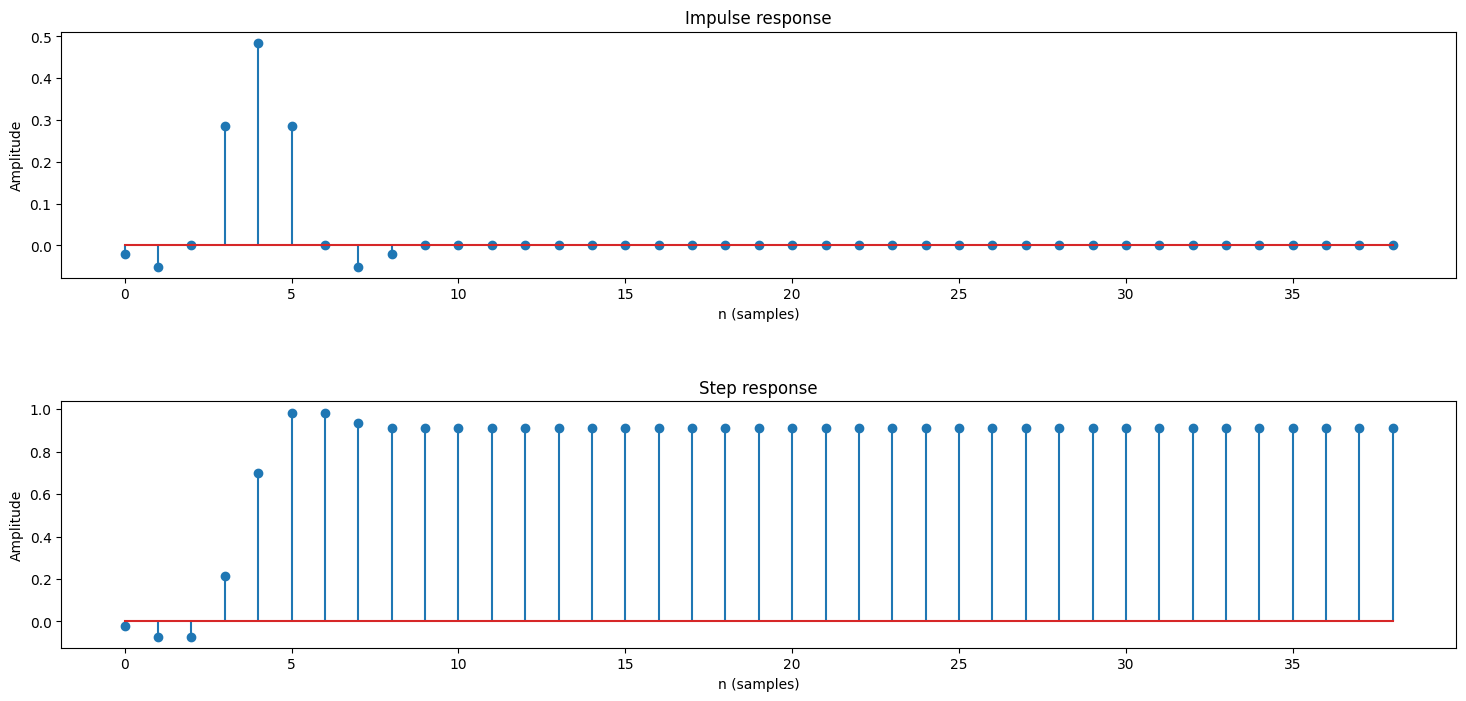

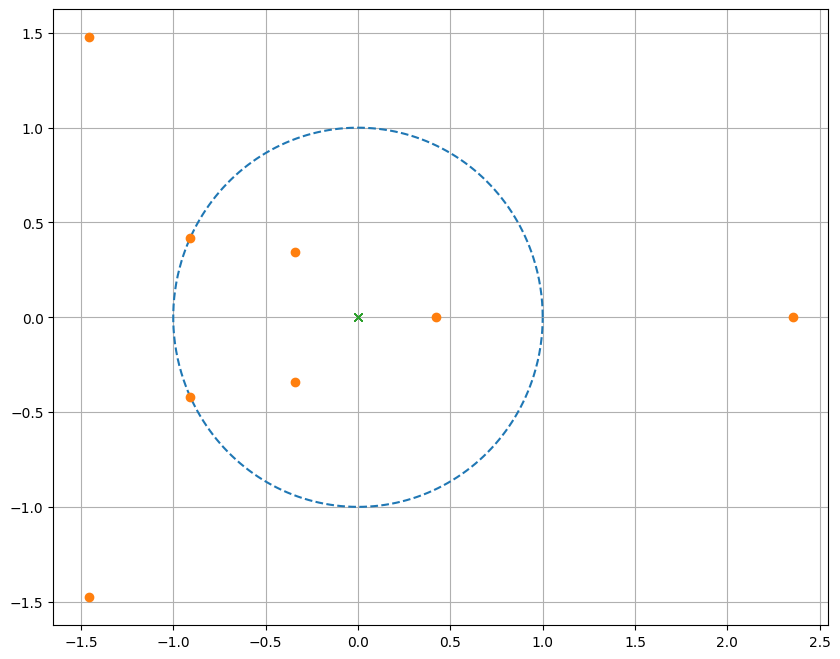

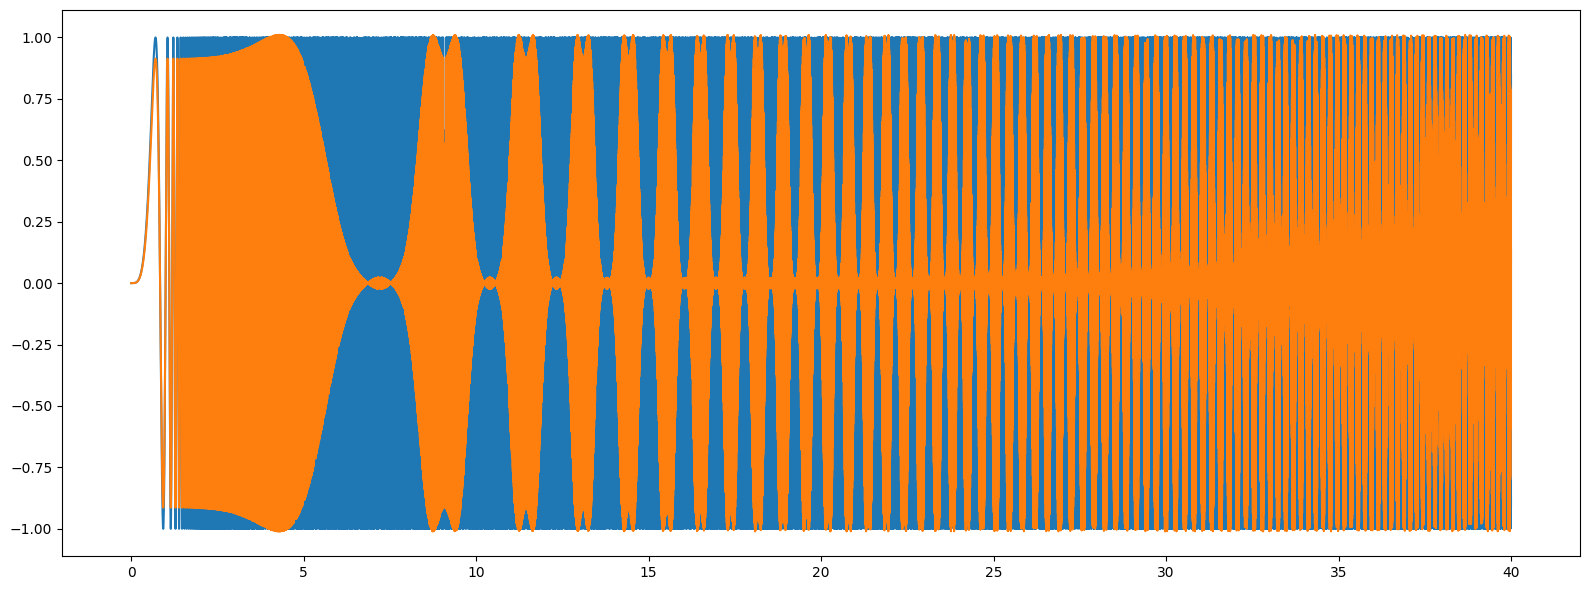

In [41]:
n = 9
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

mfreqz(num, den)
impz(num,den)
zeropoles(num,den)


data2=np.convolve(x, num, mode='same')
plt.figure(figsize=(16,6))
plt.plot(t,x)
plt.plot(t, data2)
plt.tight_layout()
plt.show()

<p>
El sistema en terminos generales se comporta como un pasabandas, el sistema sigue siendo estable y a medida que se cambia la frecuencia y va aumentando el comportmiento cambia a forma de parecerse a una sirena, esto debido al efecto de aliasing, esto por que la frecuencia se va acercando más a la frecuencia de Nyquist, además se nota en el diagrama de fase como se va adelantando y atrasando la señal. 
</p>

<h1>3. Agregando polos y ceros</h1>

<p>3.1. Retorne al sistema anterior N=10

<p>3.2.Uso de la función para agregar polos y ceros. </p>

In [50]:
n = 10
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0]=1



<Figure size 640x480 with 0 Axes>

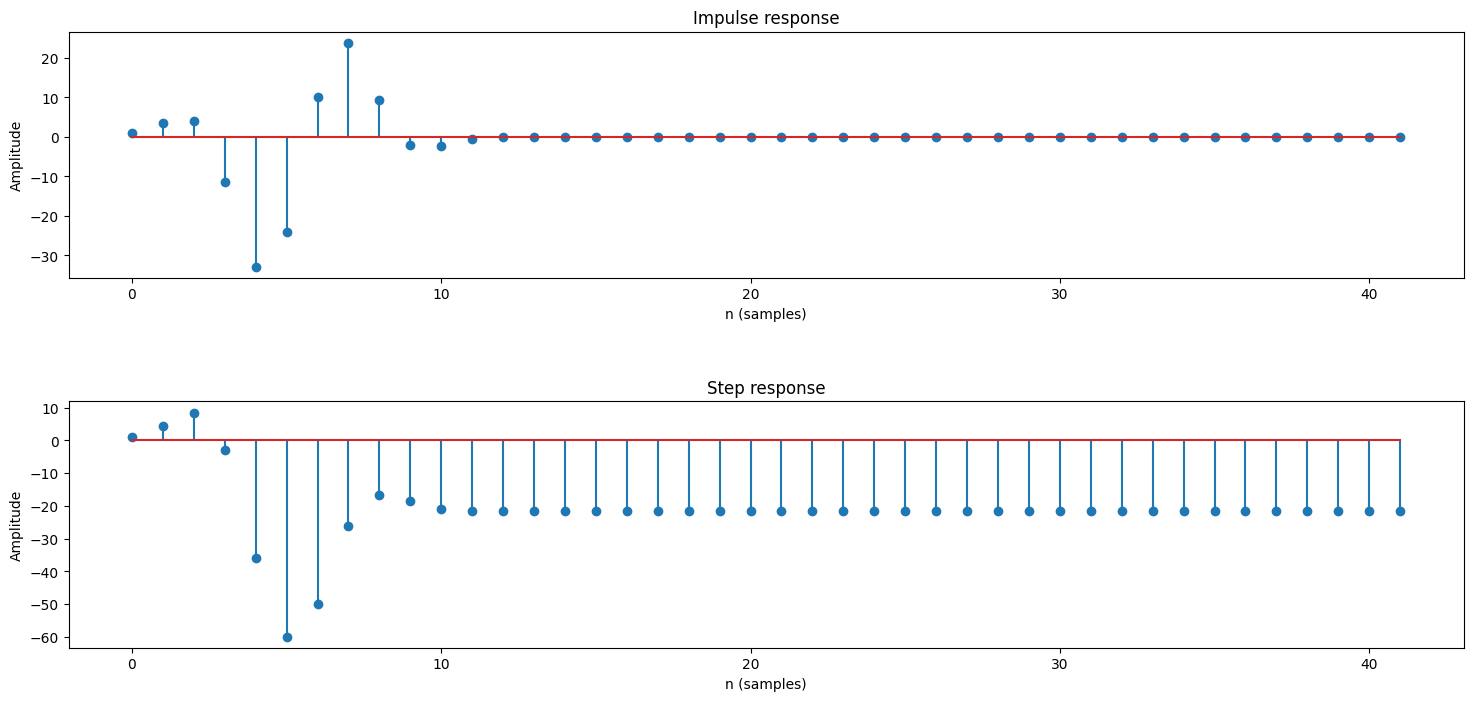

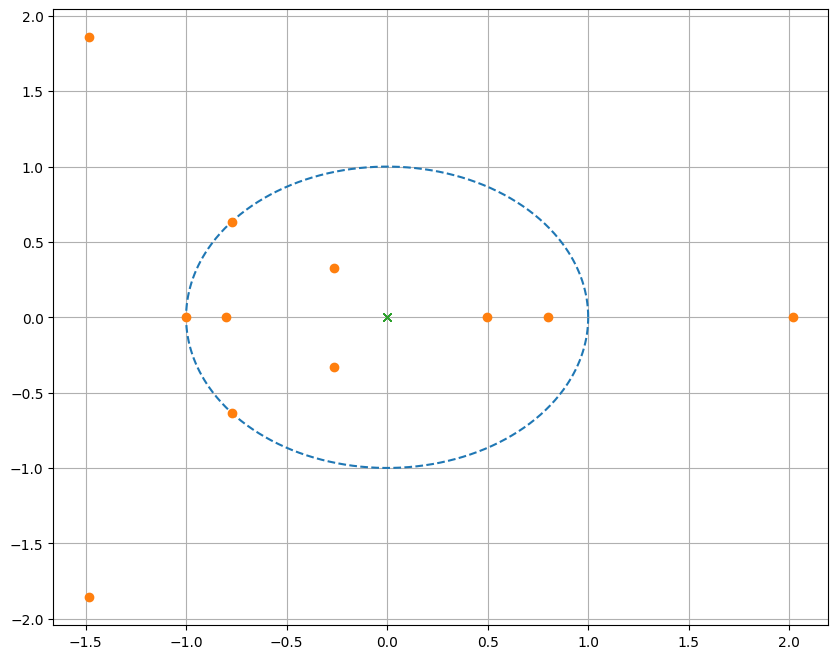

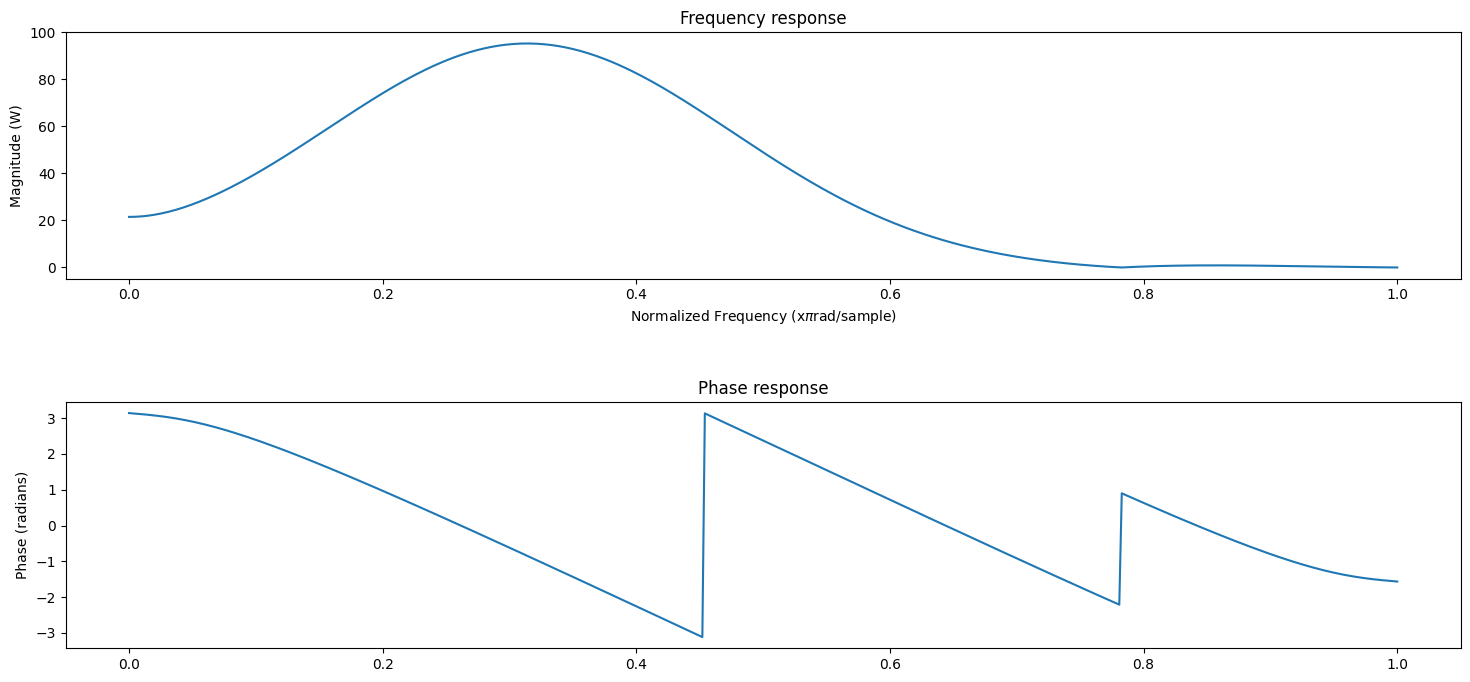

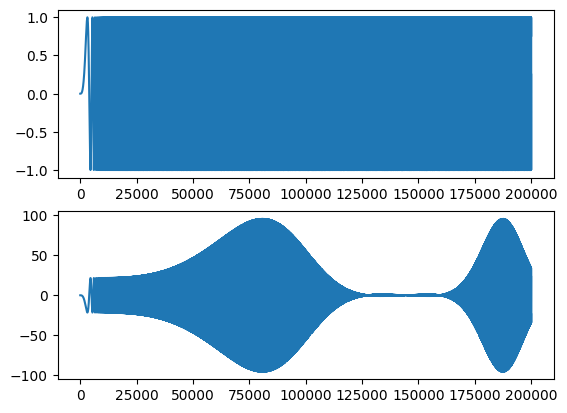

In [64]:
computeZ(num, den, [0.8,-0.8], [], x)


<Figure size 640x480 with 0 Axes>

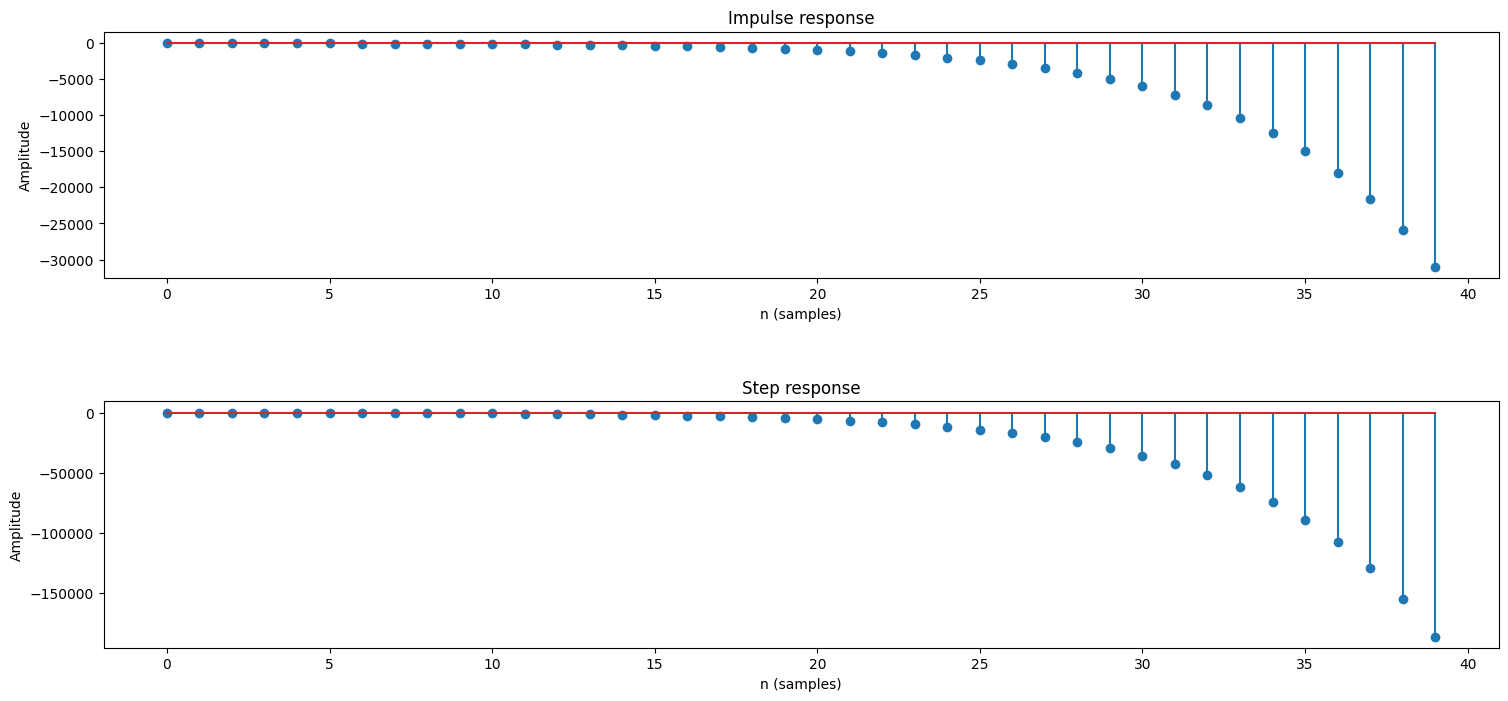

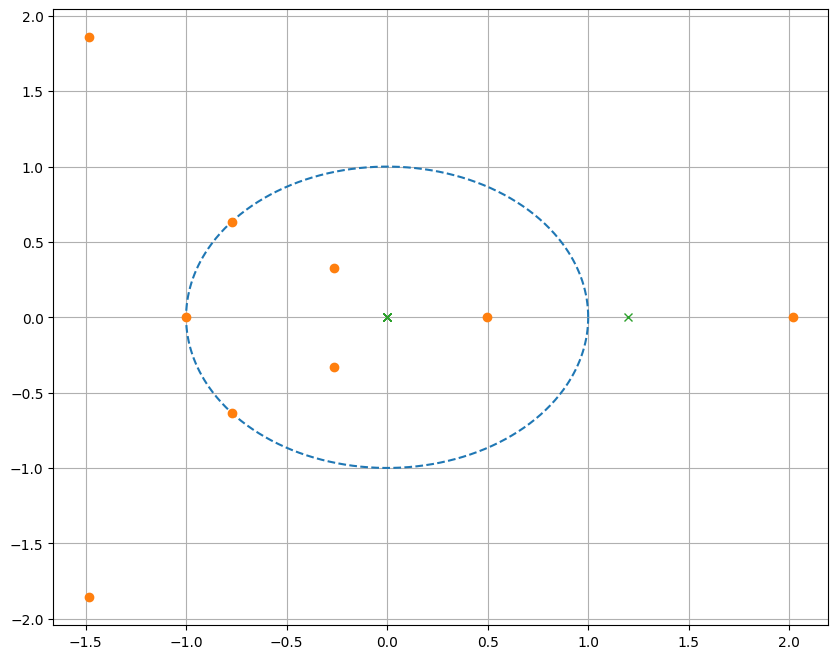

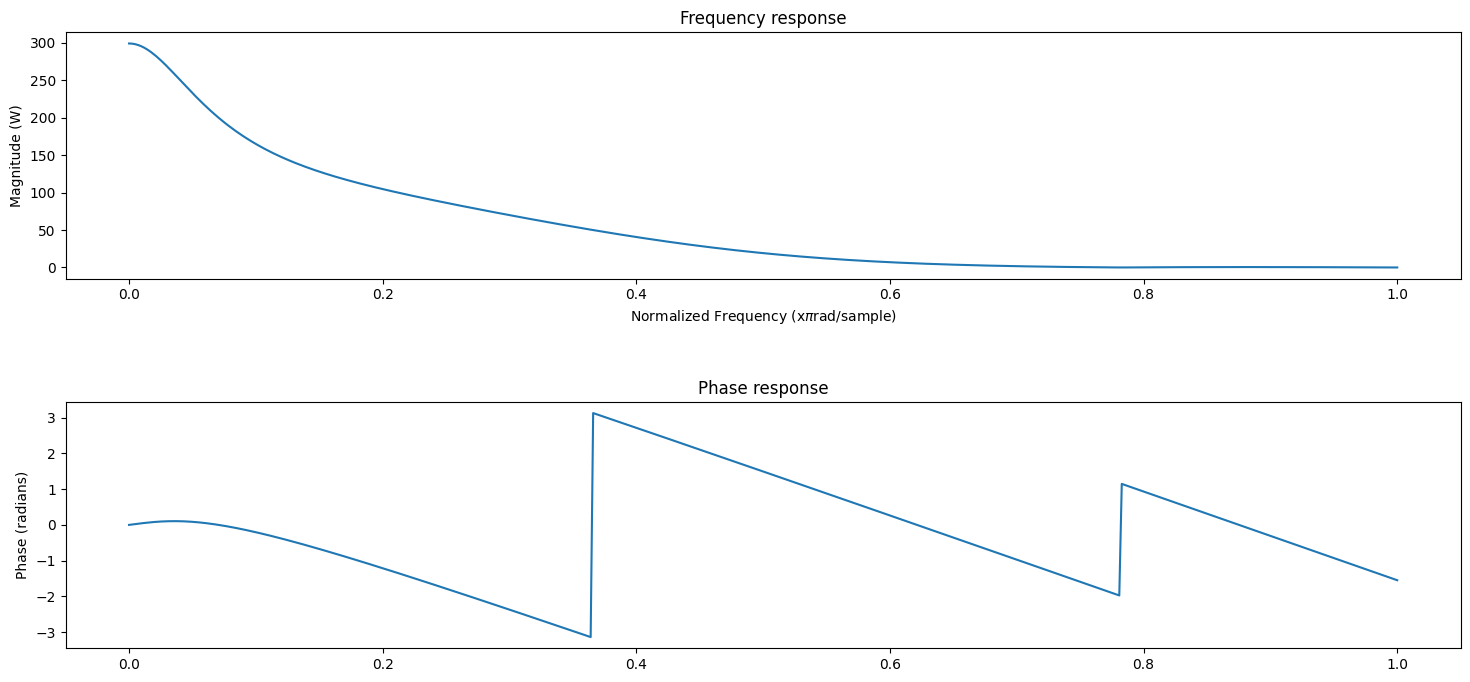

c:\Users\Asus\OneDrive - Universidad de Antioquia\Documentos\proyect\workspace\PDS_lab\PDS\PDS\lib\site-packages\matplotlib\axes\_base.py:2917: RuntimeWarning: overflow encountered in scalar subtract
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


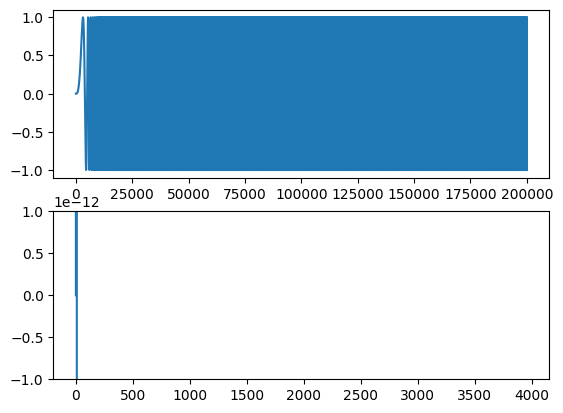

In [62]:
computeZ(num, den, [], [1.2], x)


<p>Cuando se agregan ceros, como es el caso del primer intento, el sistema sigue comportandose de forma estable, por otro lado, cuando se agrega un polo extra en el lugar indicado, el sistema se torna inestable.  </p>

<h1>Conclusiones Generales</h2>

<li>En terminos generales la estabilidad del sistema se ve afectada principalmente por la adición de polos en puntos estrategicos, esto en la aplicación puede influir en tiempos de estabilidad de algún sistema.</li>
<li>Cuando se analizan las señales senosoidales su respuesta con los diagramas de bode, se puede ver como se comporta como un pasabajas, y al momento de hacer la convolusión de la señal con el filtro que se genera, se ve un comportamiento como si de un rechazabanda se tratara. Sin embargo,es posible notar que a medida que la frecuencia aumenta y se va acercando a su frecuencia de muestreo, comienza a presentarse el efecto de aliasing.</li>
<li> los filtros FIR son una herramienta versátil y poderosa en el procesamiento de señales, con ventajas significativas en términos de diseño, estabilidad y flexibilidad en la respuesta en frecuencia. Su capacidad para proporcionar una respuesta en frecuencia personalizada y su facilidad de implementación los convierten en una elección común en una amplia gama de aplicaciones, desde filtrado de señales de audio hasta procesamiento de imágenes y comunicaciones.Además el filtro FIR por sus caracteristicas son inherentemente estables</li>
<li>A medida que se van añadiendo valores de N, que corresponden al orden del filtro, se van añadiendo más ceros a la FT, lo cual cuando se convolucionaba con la señal, mostraba una franja que iba aumentando considerablemente, lo que hacía parecer según la conclusión 2, un rechazabanda, cuando los diagramas de bode , mostraban una  forma de pasabandas.</li>